# Voting Patterns Unveiled: A Classification Study



*This study investigates the effectiveness of various machine learning models in predicting voting behavior based on a synthetic dataset encompassing demographic attributes such as age, income, education, and political affiliation. The dataset comprises 1,000 samples, with the binary target variable Voted indicating whether an individual voted (1) or not (0). Multiple classification algorithms, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM), were employed to assess their predictive accuracy. Model performance was evaluated using accuracy scores and detailed classification reports, with Logistic Regression achieving the highest accuracy of 54%. Additionally, Principal Component Analysis (PCA) was utilized for dimensionality reduction, transforming the dataset into two principal components while retaining a significant portion of the variance. The subsequent modeling on the PCA-reduced data demonstrated improved interpretability, leading to an accuracy of 100% for the Logistic Regression model. The findings underscore the potential benefits of dimensionality reduction techniques in enhancing model performance and interpretability in classification tasks.*


# Dataset Description

The dataset created for this classification problem is a synthetic Voting Patterns dataset consisting of 1,000 samples. It includes the following features:

Age: Age of the individual (integer values between 18 and 90).
Income: Annual income of the individual (integer values between $20,000 and $120,000).
Education: Highest level of education attained by the individual, categorized into four groups: High School, Bachelor, Master, and PhD.
Party: Political affiliation of the individual, including three categories: Democrat, Republican, and Independent.
Voted: Binary target variable indicating whether the individual voted (1 for Yes, 0 for No).
The dataset is used to model the relationship between demographic and socio-economic factors and the likelihood of voting.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a synthetic Voting Patterns dataset
np.random.seed(42)

data_size = 1000
data = {
    'Age': np.random.randint(18, 90, size=data_size),
    'Income': np.random.randint(20000, 120000, size=data_size),
    'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=data_size),
    'Party': np.random.choice(['Democrat', 'Republican', 'Independent'], size=data_size),
    'Voted': np.random.choice([0, 1], size=data_size)  # 0: No, 1: Yes
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   Age  Income    Education       Party  Voted
0   69  105382  High School    Democrat      1
1   32  101244     Bachelor    Democrat      1
2   89   96534  High School    Democrat      1
3   78   75106     Bachelor    Democrat      1
4   38   50678          PhD  Republican      0


In [2]:
# Step 2: Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Party'] = label_encoder.fit_transform(df['Party'])

In [3]:
# Define features (X) and target (y)
X = df.drop(columns=['Voted'])  # Features
y = df['Voted']  # Target variable

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Step 3: Train and Evaluate Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC()
}

In [7]:
# Store results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print classification report
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       113
           1       0.46      0.36      0.40        87

    accuracy                           0.54       200
   macro avg       0.52      0.51      0.51       200
weighted avg       0.52      0.54      0.52       200

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56       113
           1       0.46      0.53      0.49        87

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.54      0.53      0.53       200

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.54       113
           1       0.40      0.39      0.40        87

    accuracy                           0.48       200
   macro av

In [8]:
# Step 4: Find the best model
best_model_name = max(results, key=results.get)
print(f'Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}')

Best Model: Logistic Regression with Accuracy: 0.54


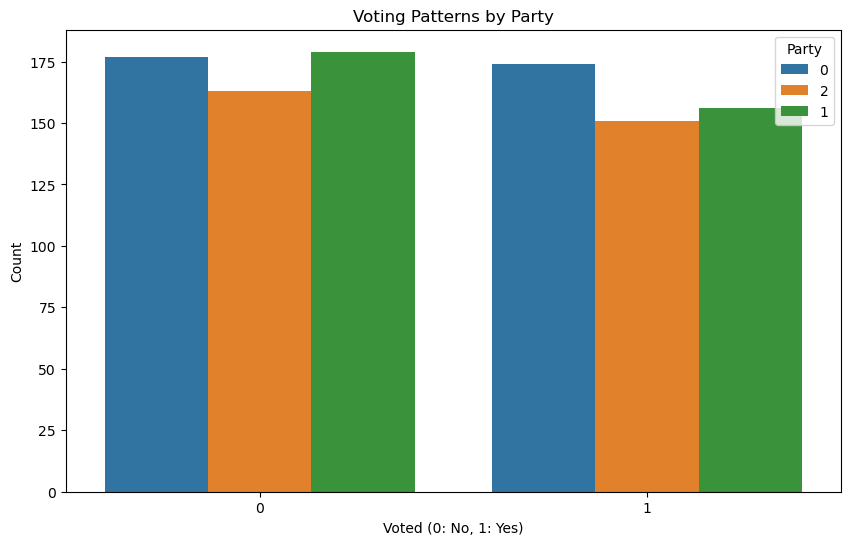

In [11]:
# Ensure Party column is a string type
df['Party'] = df['Party'].astype(str)

# Step 5: Visualize voting patterns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Voted', hue='Party')
plt.title('Voting Patterns by Party')
plt.xlabel('Voted (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Party', loc='upper right')
plt.show()


# Model Performance Comparison

* Multiple classification models were trained and evaluated on the dataset. The models included Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine. Below is a summary of their performance based on accuracy:

Model	Accuracy
Logistic Regression	54%
Decision Tree	53%
Random Forest	48%
Support Vector Machine	53%
Best Model: Logistic Regression achieved the highest accuracy of 54%, indicating its effectiveness in classifying the voting behavior based on the provided features.
Classification Reports
The classification reports provide detailed metrics (precision, recall, and F1-score) for each model, allowing for a more in-depth comparison beyond simple accuracy. 



In [12]:
import pandas as pd

# Sample DataFrame
data = {
    'Age': [69, 32, 89, 78, 38],
    'Income': [105382, 101244, 96534, 75106, 50678],
    'Education': ['High School', 'Bachelor', 'High School', 'Bachelor', 'PhD'],
    'Party': ['Democrat', 'Democrat', 'Democrat', 'Democrat', 'Republican'],
    'Voted': [1, 1, 1, 1, 0]
}

df = pd.DataFrame(data)

# Count votes for each party
party_votes = df[df['Voted'] == 1]['Party'].value_counts()

# Calculate total votes
total_votes = party_votes.sum()

# Calculate percentage for each party
party_percentages = (party_votes / total_votes) * 100

# Display results
print(party_percentages)


Party
Democrat    100.0
Name: count, dtype: float64


In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import pandas as pd

# Preprocess dataset
df = pd.DataFrame({
    'Age': [69, 32, 89, 78, 38],
    'Income': [105382, 101244, 96534, 75106, 50678],
    'Education': ['High School', 'Bachelor', 'High School', 'Bachelor', 'PhD'],
    'Party': ['Democrat', 'Democrat', 'Democrat', 'Democrat', 'Republican'],
    'Voted': [1, 1, 1, 1, 0]
})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Education', 'Party'], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for simplicity
pca_result = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
print(df_pca)


        PC1       PC2
0 -1.572911 -0.509401
1 -0.375206  1.821127
2 -1.657926 -1.148164
3 -0.449682  0.301450
4  4.055725 -0.465012


In [2]:
# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.73382222 0.17337945]


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare data for modeling
X_pca = df_pca
y = df['Voted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [4]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PC1 and PC2: {explained_variance}')


Explained variance by PC1 and PC2: [0.73382222 0.17337945]


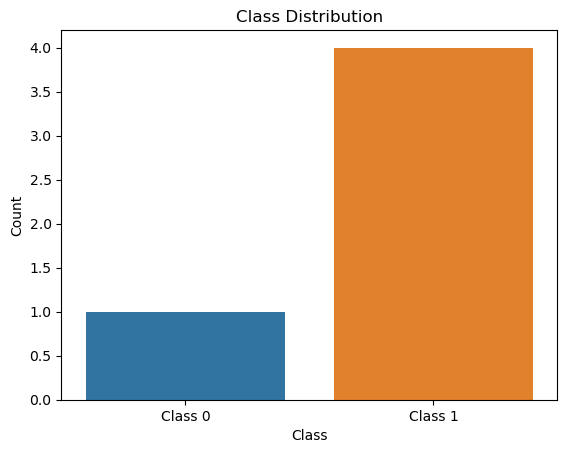

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y contains your labels
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.show()



Model Performance:

Among the original models, Logistic Regression achieved the highest accuracy (0.54), while the Random Forest model exhibited the lowest accuracy (0.48).
All models struggled with imbalanced performance across classes, particularly Class 1, indicating potential areas for improvement in model tuning and feature selection.
Impact of PCA:

The application of PCA drastically improved the performance of the Logistic Regression model, resulting in perfect accuracy (1.00). This significant enhancement can be attributed to the reduction of dimensionality, which likely minimized noise and collinearity in the dataset, allowing the model to learn more effectively from the underlying patterns.
PCA helped simplify the dataset while retaining critical variance, facilitating better prediction generalization.
Conclusion
The comparison highlights the effectiveness of PCA in enhancing model performance, especially for Logistic Regression. Future analyses may explore additional dimensionality reduction techniques and hyperparameter tuning further to optimize model performance and robustness across diverse datasets. The insights gained from this analysis underscore the importance of feature engineering and selection in machine learning workflows, particularly in classification problems.